In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
pip install pmdarima

In [ ]:
!pip install chart_studio

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from pandas import datetime
from pmdarima.arima import auto_arima

In [ ]:
import datetime as dt

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import datetime

In [ ]:
df_states=pd.read_csv('/content/drive/MyDrive/crimes_hackathon/State Wise Merged.csv')

In [ ]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            572 non-null    int64  
 1   STATE/UT                              572 non-null    object 
 2   YEAR                                  572 non-null    float64
 3   RESIDENTIAL PREMISES - Dacoity        572 non-null    float64
 4   RESIDENTIAL PREMISES - Robbery        572 non-null    float64
 5   RESIDENTIAL PREMISES - Burglary       572 non-null    float64
 6   RESIDENTIAL PREMISES - Theft          572 non-null    float64
 7   HIGHWAYS - Dacoity                    572 non-null    float64
 8   HIGHWAYS - Robbery                    572 non-null    float64
 9   HIGHWAYS - Burglary                   572 non-null    float64
 10  HIGHWAYS - Theft                      572 non-null    float64
 11  RIVER and SEA - Dac

In [ ]:
df_states['STATE/UT'][0]

'ANDHRA PRADESH'

In [ ]:
for i in range(len(df_states)):
  df_states['STATE/UT'][i]=df_states['STATE/UT'][i].upper()
  df_states['STATE/UT'][i]=df_states['STATE/UT'][i].replace(' ',"")
  df_states['STATE/UT'][i]=df_states['STATE/UT'][i].replace('-',"")
  if df_states['STATE/UT'][i]=='TOTAL(STATES)':
    df_states['STATE/UT'][i]='TOTAL(STATE)'    


In [ ]:
df_states.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
states=df_states['STATE/UT'].unique()

In [ ]:
len(states)

40

In [ ]:
l=[]
for i in states:
  l.append(df_states[df_states['STATE/UT']==i])

In [ ]:
l[0]

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRAPRADESH,2001.0,100.0,177.0,5158.0,4257.0,57.0,172.0,31.0,74.0,...,1041.0,2502.0,37.0,232.0,862.0,8849.0,214.0,629.0,7220.0,16751
38,ANDHRAPRADESH,2002.0,110.0,230.0,5904.0,6129.0,36.0,164.0,11.0,204.0,...,1083.0,2911.0,46.0,218.0,594.0,8832.0,197.0,648.0,7628.0,19222
75,ANDHRAPRADESH,2003.0,86.0,254.0,6504.0,7487.0,34.0,120.0,20.0,130.0,...,1330.0,2991.0,41.0,225.0,1189.0,11572.0,176.0,660.0,9050.0,23408
113,ANDHRAPRADESH,2004.0,120.0,257.0,6249.0,7710.0,51.0,126.0,23.0,333.0,...,1083.0,2656.0,20.0,172.0,1058.0,11864.0,199.0,596.0,8457.0,23578
151,ANDHRAPRADESH,2005.0,109.0,262.0,5502.0,6920.0,59.0,165.0,2.0,150.0,...,1279.0,1872.0,63.0,331.0,1150.0,14026.0,250.0,794.0,7954.0,23778
189,ANDHRAPRADESH,2006.0,77.0,223.0,6191.0,9766.0,42.0,101.0,50.0,330.0,...,1124.0,2970.0,42.0,305.0,915.0,9802.0,178.0,679.0,8304.0,23510
227,ANDHRAPRADESH,2007.0,53.0,221.0,5208.0,9117.0,35.0,101.0,31.0,133.0,...,1085.0,2395.0,77.0,257.0,1336.0,11927.0,170.0,614.0,7677.0,24391
265,ANDHRAPRADESH,2008.0,45.0,226.0,6185.0,9532.0,28.0,91.0,0.0,305.0,...,931.0,2569.0,34.0,275.0,1197.0,12128.0,110.0,623.0,8332.0,25362
304,ANDHRAPRADESH,2009.0,24.0,169.0,5499.0,9373.0,31.0,115.0,80.0,314.0,...,686.0,2427.0,40.0,241.0,1436.0,11115.0,102.0,544.0,7772.0,24692
342,ANDHRAPRADESH,2010.0,49.0,194.0,5623.0,9619.0,40.0,88.0,172.0,506.0,...,799.0,3445.0,39.0,235.0,1575.0,12181.0,134.0,550.0,8200.0,26756


In [ ]:
l[0]=l[0].drop(533)

In [ ]:
l[0]

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRAPRADESH,2001.0,100.0,177.0,5158.0,4257.0,57.0,172.0,31.0,74.0,...,1041.0,2502.0,37.0,232.0,862.0,8849.0,214.0,629.0,7220.0,16751
38,ANDHRAPRADESH,2002.0,110.0,230.0,5904.0,6129.0,36.0,164.0,11.0,204.0,...,1083.0,2911.0,46.0,218.0,594.0,8832.0,197.0,648.0,7628.0,19222
75,ANDHRAPRADESH,2003.0,86.0,254.0,6504.0,7487.0,34.0,120.0,20.0,130.0,...,1330.0,2991.0,41.0,225.0,1189.0,11572.0,176.0,660.0,9050.0,23408
113,ANDHRAPRADESH,2004.0,120.0,257.0,6249.0,7710.0,51.0,126.0,23.0,333.0,...,1083.0,2656.0,20.0,172.0,1058.0,11864.0,199.0,596.0,8457.0,23578
151,ANDHRAPRADESH,2005.0,109.0,262.0,5502.0,6920.0,59.0,165.0,2.0,150.0,...,1279.0,1872.0,63.0,331.0,1150.0,14026.0,250.0,794.0,7954.0,23778
189,ANDHRAPRADESH,2006.0,77.0,223.0,6191.0,9766.0,42.0,101.0,50.0,330.0,...,1124.0,2970.0,42.0,305.0,915.0,9802.0,178.0,679.0,8304.0,23510
227,ANDHRAPRADESH,2007.0,53.0,221.0,5208.0,9117.0,35.0,101.0,31.0,133.0,...,1085.0,2395.0,77.0,257.0,1336.0,11927.0,170.0,614.0,7677.0,24391
265,ANDHRAPRADESH,2008.0,45.0,226.0,6185.0,9532.0,28.0,91.0,0.0,305.0,...,931.0,2569.0,34.0,275.0,1197.0,12128.0,110.0,623.0,8332.0,25362
304,ANDHRAPRADESH,2009.0,24.0,169.0,5499.0,9373.0,31.0,115.0,80.0,314.0,...,686.0,2427.0,40.0,241.0,1436.0,11115.0,102.0,544.0,7772.0,24692
342,ANDHRAPRADESH,2010.0,49.0,194.0,5623.0,9619.0,40.0,88.0,172.0,506.0,...,799.0,3445.0,39.0,235.0,1575.0,12181.0,134.0,550.0,8200.0,26756


In [ ]:
df1=l[0][['YEAR','RESIDENTIAL PREMISES - Dacoity','RESIDENTIAL PREMISES - Robbery']]

In [ ]:
df1['YEAR']

0      2001.0
38     2002.0
75     2003.0
113    2004.0
151    2005.0
189    2006.0
227    2007.0
265    2008.0
304    2009.0
342    2010.0
380    2011.0
418    2012.0
456    2013.0
494    2014.0
Name: YEAR, dtype: float64

In [ ]:
#import datetime as dt
#date_str='01-01-'+str(int(df1['YEAR'][0]))
#d = dt.datetime.strptime(date_str, "%d-%m-%Y")

In [ ]:
df1=df1.set_index('YEAR')

In [ ]:
#df1.drop('YEAR',axis=1,inplace=True)

In [ ]:
df1

,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery
YEAR,,
2001.0,100.0,177.0
2002.0,110.0,230.0
2003.0,86.0,254.0
2004.0,120.0,257.0
2005.0,109.0,262.0
2006.0,77.0,223.0
2007.0,53.0,221.0
2008.0,45.0,226.0
2009.0,24.0,169.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14 entries, 2001.0 to 2014.0
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RESIDENTIAL PREMISES - Dacoity  14 non-null     float64
 1   RESIDENTIAL PREMISES - Robbery  14 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df1['RESIDENTIAL PREMISES - Dacoity'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.070889e+01
p-value                 3.371642e-19
# lags used             5.000000e+00
# observations          8.000000e+00
critical value (1%)    -4.665186e+00
critical value (5%)    -3.367187e+00
critical value (10%)   -2.802961e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df1['RESIDENTIAL PREMISES - Robbery'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.617860e+00
p-value                 2.167637e-11
# lags used             5.000000e+00
# observations          8.000000e+00
critical value (1%)    -4.665186e+00
critical value (5%)    -3.367187e+00
critical value (10%)   -2.802961e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
df1.iloc[:-2]

,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery
YEAR,,
2001.0,100.0,177.0
2002.0,110.0,230.0
2003.0,86.0,254.0
2004.0,120.0,257.0
2005.0,109.0,262.0
2006.0,77.0,223.0
2007.0,53.0,221.0
2008.0,45.0,226.0
2009.0,24.0,169.0


In [ ]:
test_obs = 2
train = df1.iloc[:-test_obs]
test = df1.iloc[-test_obs:]

In [ ]:
train

,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery
YEAR,,
2001.0,100.0,177.0
2002.0,110.0,230.0
2003.0,86.0,254.0
2004.0,120.0,257.0
2005.0,109.0,262.0
2006.0,77.0,223.0
2007.0,53.0,221.0
2008.0,45.0,226.0
2009.0,24.0,169.0


In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  12.139192088316161
BIC:  12.356225873478907

Order = 2
AIC:  12.64279237467198
BIC:  12.945377467666027

Order = 3
AIC:  12.748297924389224
BIC:  13.055091711356678

Order = 4
AIC:  -110.65141234879681
BIC:  -110.47266888001718

Order = 5
AIC:  -115.4694161741745
BIC:  -115.63941284857209

Order = 6
AIC:  -113.9944115882736
BIC:  -114.89678722161871

Order = 7
AIC:  -111.6064715839934
BIC:  -113.94984410938879

Order = 8
AIC:  -110.38047619285331
BIC:  -115.59697412333423

Order = 9
AIC:  -101.51260070913666
BIC:  -112.93017838600727



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignore

In [ ]:
result = model.fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, May, 2022
Time:                     14:22:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -115.639
Nobs:                     7.00000    HQIC:                  -117.571
Log likelihood:           406.278    FPE:                2.68438e-52
AIC:                     -115.469    Det(Omega_mle):     4.05971e-53
--------------------------------------------------------------------
Results for equation RESIDENTIAL PREMISES - Dacoity
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.001401              NAN              NAN             NAN
L1.RESIDENTIAL PREMISES - Dacoity         0.115273      

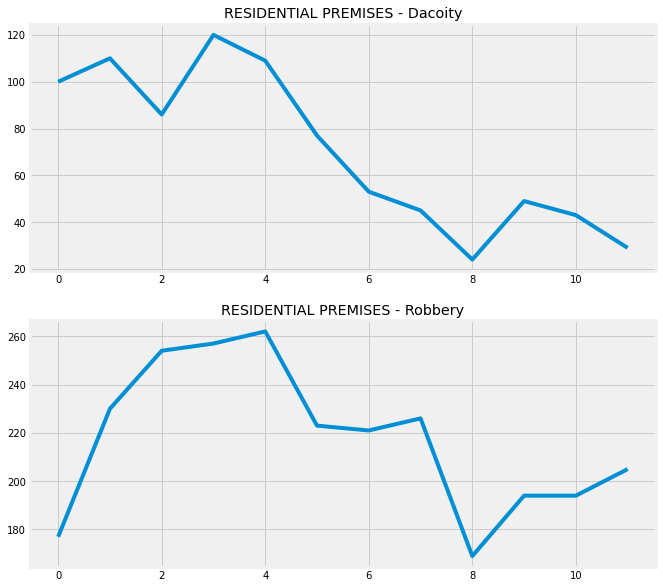

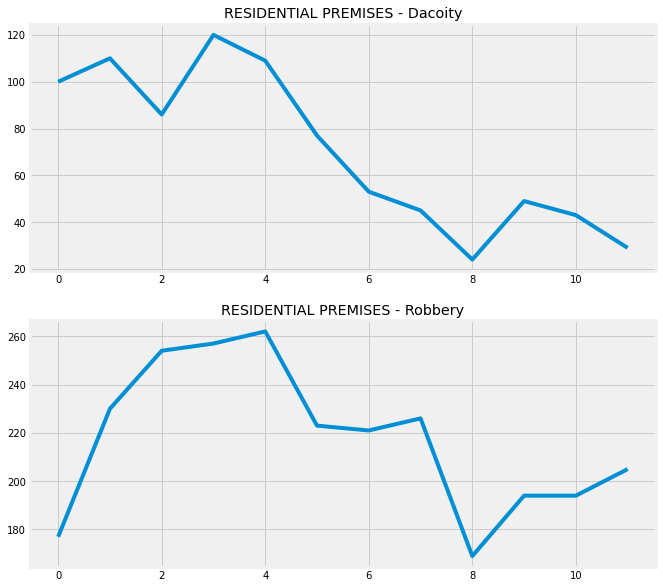

In [ ]:
results.plot()

In [ ]:
lag_oder=results.k_ar

In [ ]:
input_data=train.values[-lag_oder:]

In [ ]:
input_data

array([[120., 257.],
       [109., 262.],
       [ 77., 223.],
       [ 53., 221.],
       [ 45., 226.],
       [ 24., 169.],
       [ 49., 194.],
       [ 43., 194.],
       [ 29., 205.]])

In [ ]:
pred = result.forecast(y=input_data, steps=2)
pred = (pd.DataFrame(pred, index=test.index, columns= test.columns + '_pred'))
print(pred)

        RESIDENTIAL PREMISES - Dacoity_pred  \
YEAR                                          
2013.0                            52.507142   
2014.0                            53.982995   

        RESIDENTIAL PREMISES - Robbery_pred  
YEAR                                         
2013.0                           226.707358  
2014.0                           225.922823  


In [ ]:
test

,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery
YEAR,,
2013.0,43.0,229.0
2014.0,27.0,124.0


In [ ]:
# forecast bias
forecast_errors = []
for i in range(len(test)):
  forecast_errors.append(test['RESIDENTIAL PREMISES - Dacoity'][i]- pred['RESIDENTIAL PREMISES - Dacoity_pred'][i])
bias = sum(forecast_errors) * 1.0/len(test['RESIDENTIAL PREMISES - Dacoity'])
print('Bias: %f' % bias)

KeyError: ignored

In [ ]:
mae = mean_absolute_error(test['RESIDENTIAL PREMISES - Dacoity'], pred['RESIDENTIAL PREMISES - Dacoity_pred'])
print('MAE: %f' % mae)

#District wise 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/crimes_hackathon/District Wise Merged.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 35 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           10678 non-null  int64  
 1   STATE/UT                                             10678 non-null  object 
 2   DISTRICT                                             10678 non-null  object 
 3   YEAR                                                 10678 non-null  int64  
 4   MURDER                                               10678 non-null  int64  
 5   ATTEMPT TO MURDER                                    10678 non-null  int64  
 6   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            10678 non-null  int64  
 7   RAPE                                                 10678 non-null  int64  
 8   CUSTODIAL RAPE                                       10678 non-nul

In [ ]:
for i in range(len(df)):
  df['STATE/UT'][i]=df['STATE/UT'][i].upper()
  df['STATE/UT'][i]=df['STATE/UT'][i].replace(' ',"")
  df['STATE/UT'][i]=df['STATE/UT'][i].replace('-',"")
  if df['STATE/UT'][i]=='TOTAL(STATES)':
    df['STATE/UT'][i]='TOTAL(STATE)'

In [ ]:
states=df['STATE/UT'].unique()

In [ ]:
for i in range(len(df)):
  df['DISTRICT'][i]=df['DISTRICT'][i].upper()

In [ ]:
dit=df['DISTRICT'].unique()

In [ ]:
len(dit)

954

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
district=[]
for i in dit:
  if len(df[df['DISTRICT']==i])==14:
    district.append(df[df['DISTRICT']==i])

In [ ]:
district[0]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Criminal Trespass/Burglary
0,ANDHRAPRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,NaN
716,ANDHRAPRADESH,ADILABAD,2002,100,79,17,37,0,37,42,...,1181,20,174,63,240,0,225,1753,4675,NaN
1435,ANDHRAPRADESH,ADILABAD,2003,107,65,11,35,0,35,46,...,1194,11,141,39,238,0,248,1917,4881,NaN
2163,ANDHRAPRADESH,ADILABAD,2004,113,83,11,50,0,50,48,...,1266,14,135,71,296,0,271,1898,5011,NaN
2892,ANDHRAPRADESH,ADILABAD,2005,108,48,13,53,0,53,65,...,1273,21,144,77,280,0,276,1838,5033,NaN
3625,ANDHRAPRADESH,ADILABAD,2006,99,88,14,64,0,64,96,...,1447,22,185,107,423,0,313,2265,6122,NaN
4365,ANDHRAPRADESH,ADILABAD,2007,112,61,12,46,0,46,83,...,1244,21,156,133,335,0,309,2160,5685,NaN
5108,ANDHRAPRADESH,ADILABAD,2008,73,82,14,50,0,50,41,...,1289,5,174,103,355,0,336,1782,5300,NaN
5869,ANDHRAPRADESH,ADILABAD,2009,85,39,11,67,0,67,73,...,1254,13,192,163,428,0,333,1762,5312,NaN
6636,ANDHRAPRADESH,ADILABAD,2010,98,90,9,48,0,48,55,...,1044,18,133,155,429,0,342,1726,4955,NaN


In [ ]:
len(district)



536

In [ ]:
df_1=district[0].copy()

In [ ]:
df_1

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Criminal Trespass/Burglary
0,ANDHRAPRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,NaN
716,ANDHRAPRADESH,ADILABAD,2002,100,79,17,37,0,37,42,...,1181,20,174,63,240,0,225,1753,4675,NaN
1435,ANDHRAPRADESH,ADILABAD,2003,107,65,11,35,0,35,46,...,1194,11,141,39,238,0,248,1917,4881,NaN
2163,ANDHRAPRADESH,ADILABAD,2004,113,83,11,50,0,50,48,...,1266,14,135,71,296,0,271,1898,5011,NaN
2892,ANDHRAPRADESH,ADILABAD,2005,108,48,13,53,0,53,65,...,1273,21,144,77,280,0,276,1838,5033,NaN
3625,ANDHRAPRADESH,ADILABAD,2006,99,88,14,64,0,64,96,...,1447,22,185,107,423,0,313,2265,6122,NaN
4365,ANDHRAPRADESH,ADILABAD,2007,112,61,12,46,0,46,83,...,1244,21,156,133,335,0,309,2160,5685,NaN
5108,ANDHRAPRADESH,ADILABAD,2008,73,82,14,50,0,50,41,...,1289,5,174,103,355,0,336,1782,5300,NaN
5869,ANDHRAPRADESH,ADILABAD,2009,85,39,11,67,0,67,73,...,1254,13,192,163,428,0,333,1762,5312,NaN
6636,ANDHRAPRADESH,ADILABAD,2010,98,90,9,48,0,48,55,...,1044,18,133,155,429,0,342,1726,4955,NaN


In [ ]:
df_1.drop('STATE/UT',axis=1,inplace=True)


In [ ]:
df_1.drop('DISTRICT',axis=1,inplace=True)

In [ ]:
 
df_1.drop('Criminal Trespass/Burglary',axis=1,inplace=True)

In [ ]:
df_1=df_1.set_index('YEAR')

In [ ]:
df_1

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,101,60,17,50,0,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
2002,100,79,17,37,0,37,42,32,10,7,...,38,1181,20,174,63,240,0,225,1753,4675
2003,107,65,11,35,0,35,46,16,30,8,...,42,1194,11,141,39,238,0,248,1917,4881
2004,113,83,11,50,0,50,48,42,6,4,...,30,1266,14,135,71,296,0,271,1898,5011
2005,108,48,13,53,0,53,65,46,19,9,...,30,1273,21,144,77,280,0,276,1838,5033
2006,99,88,14,64,0,64,96,71,25,10,...,34,1447,22,185,107,423,0,313,2265,6122
2007,112,61,12,46,0,46,83,72,11,4,...,17,1244,21,156,133,335,0,309,2160,5685
2008,73,82,14,50,0,50,41,26,15,3,...,45,1289,5,174,103,355,0,336,1782,5300
2009,85,39,11,67,0,67,73,56,17,6,...,35,1254,13,192,163,428,0,333,1762,5312


In [ ]:
train=df_1

In [ ]:
df_1

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,101,60,17,50,0,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
2002,100,79,17,37,0,37,42,32,10,7,...,38,1181,20,174,63,240,0,225,1753,4675
2003,107,65,11,35,0,35,46,16,30,8,...,42,1194,11,141,39,238,0,248,1917,4881
2004,113,83,11,50,0,50,48,42,6,4,...,30,1266,14,135,71,296,0,271,1898,5011
2005,108,48,13,53,0,53,65,46,19,9,...,30,1273,21,144,77,280,0,276,1838,5033
2006,99,88,14,64,0,64,96,71,25,10,...,34,1447,22,185,107,423,0,313,2265,6122
2007,112,61,12,46,0,46,83,72,11,4,...,17,1244,21,156,133,335,0,309,2160,5685
2008,73,82,14,50,0,50,41,26,15,3,...,45,1289,5,174,103,355,0,336,1782,5300
2009,85,39,11,67,0,67,73,56,17,6,...,35,1254,13,192,163,428,0,333,1762,5312


In [ ]:
df_1.columns

Index(['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
train=df_1.iloc[:,:2]

In [ ]:
train

,MURDER,ATTEMPT TO MURDER
YEAR,,
2001,101,60
2002,100,79
2003,107,65
2004,113,83
2005,108,48
2006,99,88
2007,112,61
2008,73,82
2009,85,39


In [ ]:
model = VAR(df_1)
results = model.fit(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [ ]:
n=1
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print(n)
    n+=1

Order = 1
AIC:  11.032360467902631
BIC:  11.293106325192571
1
Order = 2
AIC:  11.04909022147184
BIC:  11.453179096295173
2
Order = 3
AIC:  11.274958305267202
BIC:  11.781370470646946
3
Order = 4
AIC:  -26.414830500339725
BIC:  -25.870177332950444
4
Order = 5
AIC:  -114.5008028011324
BIC:  -114.01869827875497
5
Order = 6
AIC:  -112.74852988234815
BIC:  -112.49034487188868
6
Order = 7
AIC:  -108.32631395836893
BIC:  -108.55812760527473
7
Order = 8
AIC:  -110.62643743884759
BIC:  -111.80646711322194
8
Order = 9
AIC:  -107.82034076504023
BIC:  -110.78861263054107
9


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignore

In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, May, 2022
Time:                     14:59:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -110.789
Nobs:                     5.00000    HQIC:                  -115.787
Log likelihood:           293.361    FPE:                1.09929e-53
AIC:                     -107.820    Det(Omega_mle):     4.77121e-55
--------------------------------------------------------------------
Results for equation MURDER
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.000835              NAN              NAN             NAN
L1.MURDER                    0.037908         0.000000      1012393.807           0.000
L1.ATTEMPT TO MURDER        -0.

In [ ]:
results.forecast(results.endog,steps=1)

array([[101.99128522,  86.06992665]])

In [ ]:
endog=results.endog

In [ ]:
endog

array([[101,  60],
       [100,  79],
       [107,  65],
       [113,  83],
       [108,  48],
       [ 99,  88],
       [112,  61],
       [ 73,  82],
       [ 85,  39],
       [ 98,  90],
       [109,  94],
       [ 81,  80],
       [ 96,  72],
       [101,  79]])

In [ ]:
endog=np.concatenate((endog,results.forecast(results.endog,steps=1)))

In [ ]:
for i in range(6):
  endog=np.concatenate((endog,results.forecast(endog,steps=1)))

In [ ]:
endog

array([[101.        ,  60.        ],
       [100.        ,  79.        ],
       [107.        ,  65.        ],
       [113.        ,  83.        ],
       [108.        ,  48.        ],
       [ 99.        ,  88.        ],
       [112.        ,  61.        ],
       [ 73.        ,  82.        ],
       [ 85.        ,  39.        ],
       [ 98.        ,  90.        ],
       [109.        ,  94.        ],
       [ 81.        ,  80.        ],
       [ 96.        ,  72.        ],
       [101.        ,  79.        ],
       [101.99128522,  86.06992665],
       [ 87.89764628,  78.9564051 ],
       [ 95.60671647,  78.05448978],
       [103.64902223,  83.98810166],
       [101.46370548,  87.74051886],
       [ 97.1890597 ,  83.22952455],
       [ 99.0832376 ,  81.73048574]])

In [ ]:
df_1.iloc[:,12:13].isnull().sum()
for i in df_1.columns:
  if df_1[i].isnull().sum()>0:
    df_1[i].fillna(df_1[i].median(), inplace=True)

In [ ]:
df_1.iloc[:,12:13]

,BURGLARY
YEAR,
2001,198.0
2002,193.0
2003,207.0
2004,177.0
2005,191.0
2006,228.0
2007,211.0
2008,248.0
2009,200.0


In [ ]:
fdata=[]
n=1
for j in range(0,29,2):
  print(j)
  train=df_1.iloc[:,j:j+2]
  for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train)
    results = model.fit(i)
  endog=results.endog
  endog=np.concatenate((endog,results.forecast(endog,steps=8)))
  fdata.append(endog.tolist())
  


0
2
4
6
8
10
12
14
16


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignore

18
20
22
24
26
28


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignore

In [ ]:
fdata[14][0][0]

1518.0

In [ ]:
finald=[]
for i in range(22):
  l=[]
  for j in range(15):
    if fdata[j][i][0]<0:
      l.append(0)
    else:
      l.append(fdata[j][i][0])
    if fdata[j][i][1]<0:
      l.append(0)
    else:
      l.append(fdata[j][i][1])
  finald.append(l)



In [ ]:
len(finald)

22

In [ ]:
finald1=[*zip(*finald)]

In [ ]:
fdt=pd.DataFrame(finald,columns=df_1.columns)

In [ ]:
fdt

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,101.000000,60.000000,17.000000,50.000000,0.0,50.000000,46.000000,30.000000,16.000000,9.000000,...,30.000000,1131.000000,16.000000,149.000000,34.000000,175.000000,0.0,181.000000,1518.000000,4154.000000
1,100.000000,79.000000,17.000000,37.000000,0.0,37.000000,42.000000,32.000000,10.000000,7.000000,...,38.000000,1181.000000,20.000000,174.000000,63.000000,240.000000,0.0,225.000000,1753.000000,4675.000000
2,107.000000,65.000000,11.000000,35.000000,0.0,35.000000,46.000000,16.000000,30.000000,8.000000,...,42.000000,1194.000000,11.000000,141.000000,39.000000,238.000000,0.0,248.000000,1917.000000,4881.000000
3,113.000000,83.000000,11.000000,50.000000,0.0,50.000000,48.000000,42.000000,6.000000,4.000000,...,30.000000,1266.000000,14.000000,135.000000,71.000000,296.000000,0.0,271.000000,1898.000000,5011.000000
4,108.000000,48.000000,13.000000,53.000000,0.0,53.000000,65.000000,46.000000,19.000000,9.000000,...,30.000000,1273.000000,21.000000,144.000000,77.000000,280.000000,0.0,276.000000,1838.000000,5033.000000
5,99.000000,88.000000,14.000000,64.000000,0.0,64.000000,96.000000,71.000000,25.000000,10.000000,...,34.000000,1447.000000,22.000000,185.000000,107.000000,423.000000,0.0,313.000000,2265.000000,6122.000000
6,112.000000,61.000000,12.000000,46.000000,0.0,46.000000,83.000000,72.000000,11.000000,4.000000,...,17.000000,1244.000000,21.000000,156.000000,133.000000,335.000000,0.0,309.000000,2160.000000,5685.000000
7,73.000000,82.000000,14.000000,50.000000,0.0,50.000000,41.000000,26.000000,15.000000,3.000000,...,45.000000,1289.000000,5.000000,174.000000,103.000000,355.000000,0.0,336.000000,1782.000000,5300.000000
8,85.000000,39.000000,11.000000,67.000000,0.0,67.000000,73.000000,56.000000,17.000000,6.000000,...,35.000000,1254.000000,13.000000,192.000000,163.000000,428.000000,0.0,333.000000,1762.000000,5312.000000
9,98.000000,90.000000,9.000000,48.000000,0.0,48.000000,55.000000,48.000000,7.000000,5.000000,...,26.000000,1044.000000,18.000000,133.000000,155.000000,429.000000,0.0,342.000000,1726.000000,4955.000000


In [ ]:
len(district[1].columns),len(district[0].columns)

(34, 34)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_final = pd.DataFrame()
for k in range(len(district)):
  print(district[k]['DISTRICT'].unique()[0])
  df_1=district[k].copy()
  df_1.drop('STATE/UT',axis=1,inplace=True)
  df_1.drop('DISTRICT',axis=1,inplace=True)
  df_1.drop('Criminal Trespass/Burglary',axis=1,inplace=True)
  df_1=df_1.set_index('YEAR')

  for i in df_1.columns:
    if df_1[i].isnull().sum()>0:
      if(df_1[i].isnull().sum()==14):
          df[i]=0
      else:
        df_1[i].fillna(df_1[i].median(), inplace=True)
  fdata=[]
  n=1
  try:
    for j in range(0,29,2):
      train=df_1.iloc[:,j:j+2]
      for i in [1,2,3,4,5,6,7,8,9]:
        model = VAR(train)
        results = model.fit(i)
      endog=results.endog
      endog=np.concatenate((endog,results.forecast(endog,steps=8)))
      fdata.append(endog.tolist())

    finald=[]
    for i in range(22):
      l=[]
      for j in range(15):
        if fdata[j][i][0]<0:
          l.append(0)
        else:
          l.append(fdata[j][i][0])
        if fdata[j][i][1]<0:
          l.append(0)
        else:
          l.append(fdata[j][i][1])
      finald.append(l)
    fdt=pd.DataFrame()
    fdt=pd.DataFrame(finald,columns=df_1.columns)      
    fdt['DISTRICT']=district[k]['DISTRICT'].unique()[0]
    fdt['STATE/UT']=district[k]['STATE/UT'].unique()[0]
    data_final=data_final.append(fdt)
  except:
    pass  
  

ADILABAD
ANANTAPUR
CHITTOOR
CUDDAPAH
EAST GODAVARI
GUNTUR
HYDERABAD CITY
KARIMNAGAR
KHAMMAM
KRISHNA
KURNOOL
MEDAK
NALGONDA
NELLORE
NIZAMABAD
PRAKASHAM
RANGA REDDY
SRIKAKULAM
VISAKHA RURAL
VISAKHAPATNAM
VIZIANAGARAM
WARANGAL
WEST GODAVARI
CHANGLANG
DIBANG VALLEY
KAMENG EAST
KAMENG WEST
LOHIT
SIANG EAST
SIANG UPPER
SIANG WEST
SUBANSIRI LOWER
SUBANSIRI UPPER
TAWANG
TIRAP
BARPETA
BONGAIGAON
CACHAR
DARRANG
DHEMAJI
DHUBRI
DIBRUGARH
GOALPARA
GOLAGHAT
GUWAHATI CITY
HAILAKANDI
JORHAT
KAMRUP
KARBI ANGLONG
KARIMGANJ
KOKRAJHAR
LAKHIMPUR
MORIGAON
NAGAON
NALBARI
SIBSAGAR
SONITPUR
TINSUKIA
ARARIA
ARWAL
AURANGABAD
BAGAHA
BANKA
BEGUSARAI
BETTIAH
BHABHUA
BHAGALPUR
BHOJPUR
BUXAR
DARBHANGA
GAYA
GOPALGANJ
JAMUI
JEHANABAD
KATIHAR
KHAGARIA
KISHANGANJ
LAKHISARAI
MADHEPURA
MADHUBANI
MOTIHARI
MUNGER
MUZAFFARPUR
NALANDA
NAUGACHIA
NAWADAH
PATNA
PURNEA
ROHTAS
SAHARSA
SAMASTIPUR
SARAN
SHEIKHPURA
SHEOHAR
SITAMARHI
SIWAN
SUPAUL
VAISHALI
BIZAPUR
DANTEWARA
DHAMTARI
DURG
JAGDALPUR
JANJGIR
JASHPUR
KANKER
KORBA
KORIYA
MAH

In [ ]:
district[0]['STATE/UT'].unique()

array(['ANDHRAPRADESH', 'TELANGANA'], dtype=object)

In [ ]:
len(data_final['DISTRICT'].unique())

503

In [ ]:
district[9]['DISTRICT'].unique()[0]

'KRISHNA'

In [ ]:
data_final.to_csv(r'\content\drive\MyDrive\crimes_hackathon\pred distict op.csv', index = False)